# Лабораторна робота №5
## Тема: Алгоритми пошуку
### Виконала: Бояринцова Поліна
### Група: КН-24-1
### Дата: 06.04.2025

## 1. Реалізація лінійного пошуку

In [25]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

search_item = int(input("Введіть шуканий елемент: "))
a = [32, 1, 3, 4, 2, 1]
linear_search(a, search_item)

Введіть шуканий елемент:  7


-1

#### Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації (С.р.).

![linear_search](images/linear_search.jpg)

## 2. Бінарний пошук

In [26]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else: # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

a = range(7,21)

search_item = int(input("Введіть шуканий елемент: "))

bin_search(a, search_item, 0, len(a) - 1)

Введіть шуканий елемент:  5


-1

## 3. Завдання для самостійної роботи:

- оцінити асимптотичну складність алгоритму бінарного пошуку в
О-нотації.
- написати функцію, яка б могла повертати датафрейм з таким складом
полів: («n», «time»), де n – розмір масиву для функції linear_searh();
- написати функцію, яка б могла повертати датафрейм з таким складом
полів: («n», «time»), де n – розмір масиву для функції bin_searh();
- за результатами попередніх завдань побудувати графіки залежності часу
виконання процедури пошуку від розміру масиву.
- оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні
розміру задачі.

### 1. Асимптотична складність алгоритму бінарного пошуку

![bin_search](images/bin_search_1.jpg)

![bin_search](images/bin_search_2.jpg)

### 2. Функції для збору даних

#### Функція для вимірювання часу

In [27]:
import time

def measure_time_search(func, lst, x):
    start = time.time()
    func(lst, x)
    return time.time() - start

#### 2.1. Датафрейм для лінійного пошуку

In [28]:
import random

def create_linear_search_data(max_n):
    list_n = []
    list_time = []
    n = 1
    while n <= max_n:
        lst = []
        i = 0
        while i < n:
            lst.append(random.randint(0, 999))
            i += 1
        x = random.randint(0, 999)
        t = measure_time_search(linear_search, lst, x)
        list_n.append(n)
        list_time.append(t)
        n += 10
    return list_n, list_time

#### 2.2. Датафрейм для бінарного пошуку

In [29]:
def create_bin_search_data(max_n):
    list_n = []
    list_time = []
    n = 1
    while n <= max_n:
        lst = []
        i = 0
        while i < n:
            lst.append(random.randint(0, 999))
            i += 1
        lst.sort()
        x = random.randint(0, 999)
        t = measure_time_search(lambda a, x: bin_search(a, x, 0, len(a) - 1), lst, x)
        list_n.append(n)
        list_time.append(t)
        n += 10
    return list_n, list_time

### 5. Побудова графіків часу виконання
#### 5.1 Функція для побудови графіків

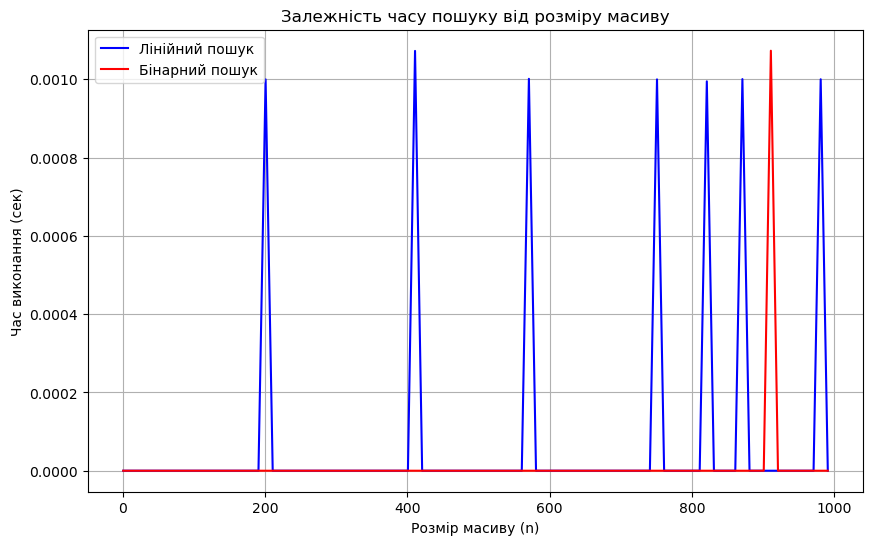

In [30]:
import matplotlib.pyplot as plt

def plot_search_times(max_n):
    lin_n, lin_t = create_linear_search_data(max_n)
    bin_n, bin_t = create_bin_search_data(max_n)

    plt.figure(figsize=(10, 6))
    plt.plot(lin_n, lin_t, label="Лінійний пошук", color="blue")
    plt.plot(bin_n, bin_t, label="Бінарний пошук", color="red")
    plt.xlabel("Розмір масиву (n)")
    plt.ylabel("Час виконання (сек)")
    plt.title("Залежність часу пошуку від розміру масиву")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_search_times(1000)

#### 5.2 Виведення графіка для максимального розміру масиву 1000

#### 6. Оцінка ефективності алгоритмів
З графіків можна зробити висновки про ефективність алгоритмів. Як правило, бінарний пошук демонструє значно кращу швидкість на великих масивах порівняно з лінійним пошуком, але для цього потрібна відсортованість масиву.

## 4. Контрольні питання

### 1. Сформулювати задачу пошуку: 

Завдання полягає в знаходженні певного елемента в колекції даних.

### 2. Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?

- Часова складність.
- Просторова складність.
- Стійкість до змін у структурі даних.

### 3. Що таке лінійний пошук і яка його асимптотична складність? 

Лінійний пошук перевіряє елементи списку по черзі. Складність — O(n).

### 4. Що таке бінарний пошук і в чому полягає його головний принцип роботи? 

Бінарний пошук використовує розподіл масиву на половини для зменшення кількості порівнянь. Складність — O(log n).

### 5. Які переваги і недоліки використання бінарного пошуку порівняно з лінійним?

- Переваги: швидше для великих масивів.
- Недоліки: потребує відсортованого масиву.

### 6. Які ще алгоритми пошуку існують, окрім лінійного і бінарного?

- Пошук за допомогою хешування.
- Пошук в глибину (DFS) та пошук в ширину (BFS) для графів.